In [1]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os 

PATH = Path('/home/fergus/data/icloud_data/raw_icloud/')

def load_photo(fn):
    img = io.imread(fn)[...,:3]
    return img 

fn = [x for x in PATH.iterdir()][0]
print(fn)


/home/fergus/data/icloud_data/raw_icloud/IMG_4275.jpg


In [3]:
import tensorflow as tf

2023-07-27 13:14:41.591681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 13:14:42.102515: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-27 13:14:42.102550: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-27 13:14:42.102554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
%%bash
nvidia-smi

Thu Jul 27 13:14:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.13    Driver Version: 525.60.13    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:03:00.0 Off |                  Off |
|  0%   44C    P8    35W / 450W |     19MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from tensorflow.keras.applications.convnext import ConvNeXtTiny

In [6]:
model = tf.keras.applications.ConvNeXtTiny(
    model_name="convnext_tiny",
    include_top=False,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [7]:
model.outputs

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'layer_normalization')>]

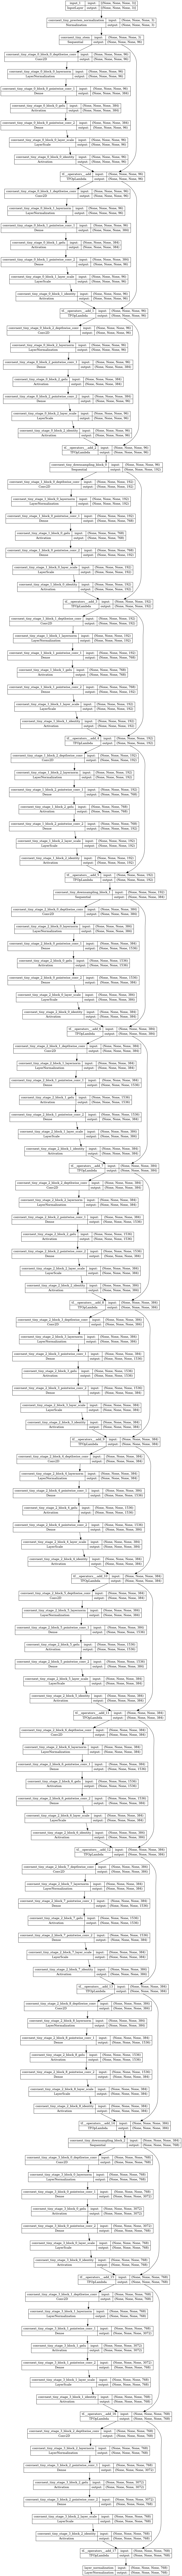

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load an image through

In [9]:
type(PATH.stem)

str

In [25]:
from src.diff import diff_directories 
embedding_dir = PATH.parent / 'embeddings'
diff_files = diff_directories(PATH, embedding_dir)
files = [(PATH / file).with_suffix('.jpg') for file in diff_files]
len(files), len(os.listdir(str(PATH)))

(475, 1126)

cleaner implementatoin 